In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
df=pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df_duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", df_duplicate_rows.shape)

number of duplicate rows:  (0, 9)


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


Skewed distribution

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())#skewed distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

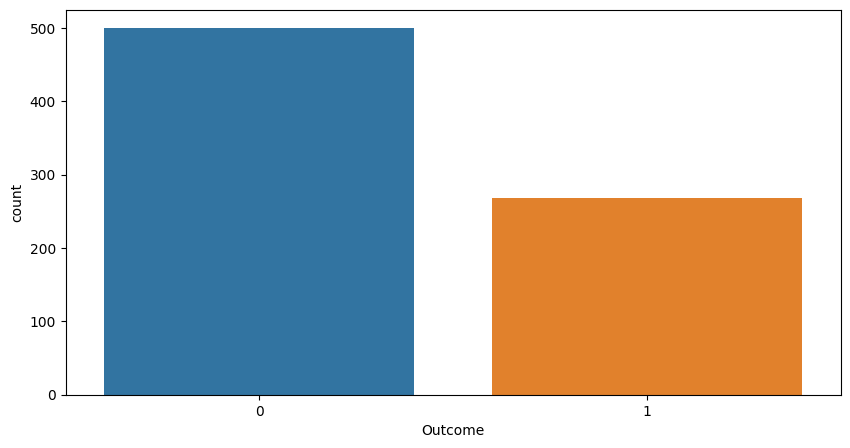

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.show()

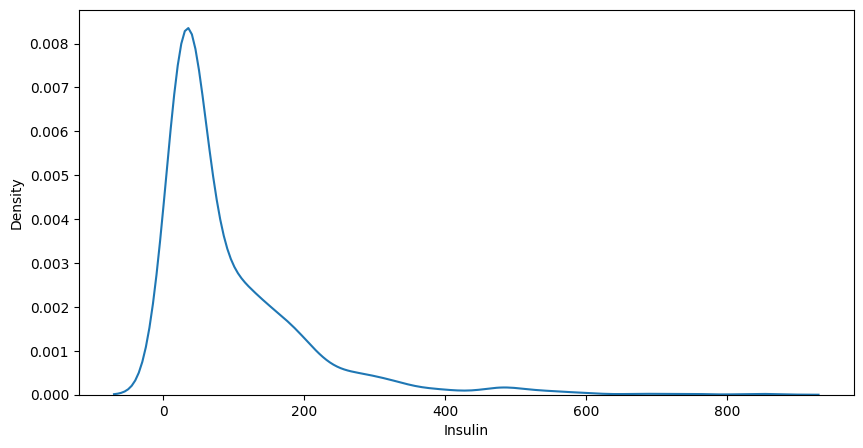

In [ ]:
sns.distplot(df['Insulin'], hist=False)
plt.show()

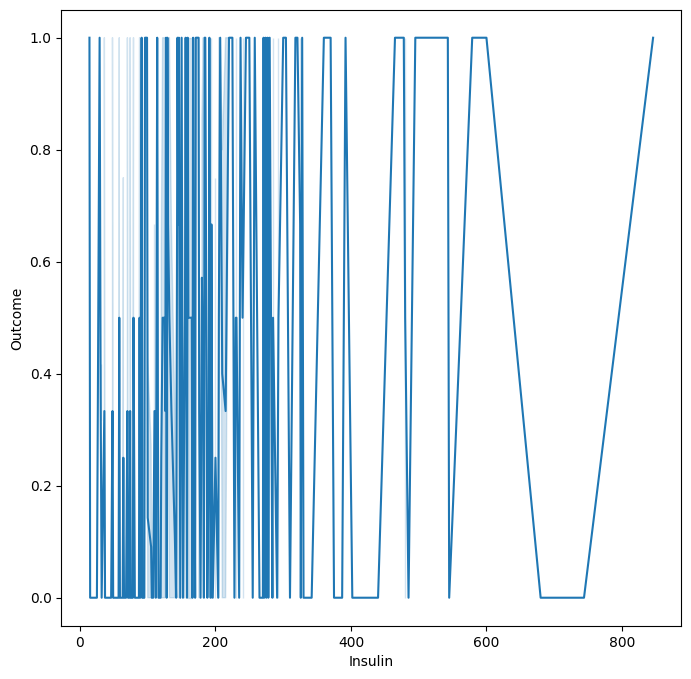

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Insulin", y="Outcome",  data=df)
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

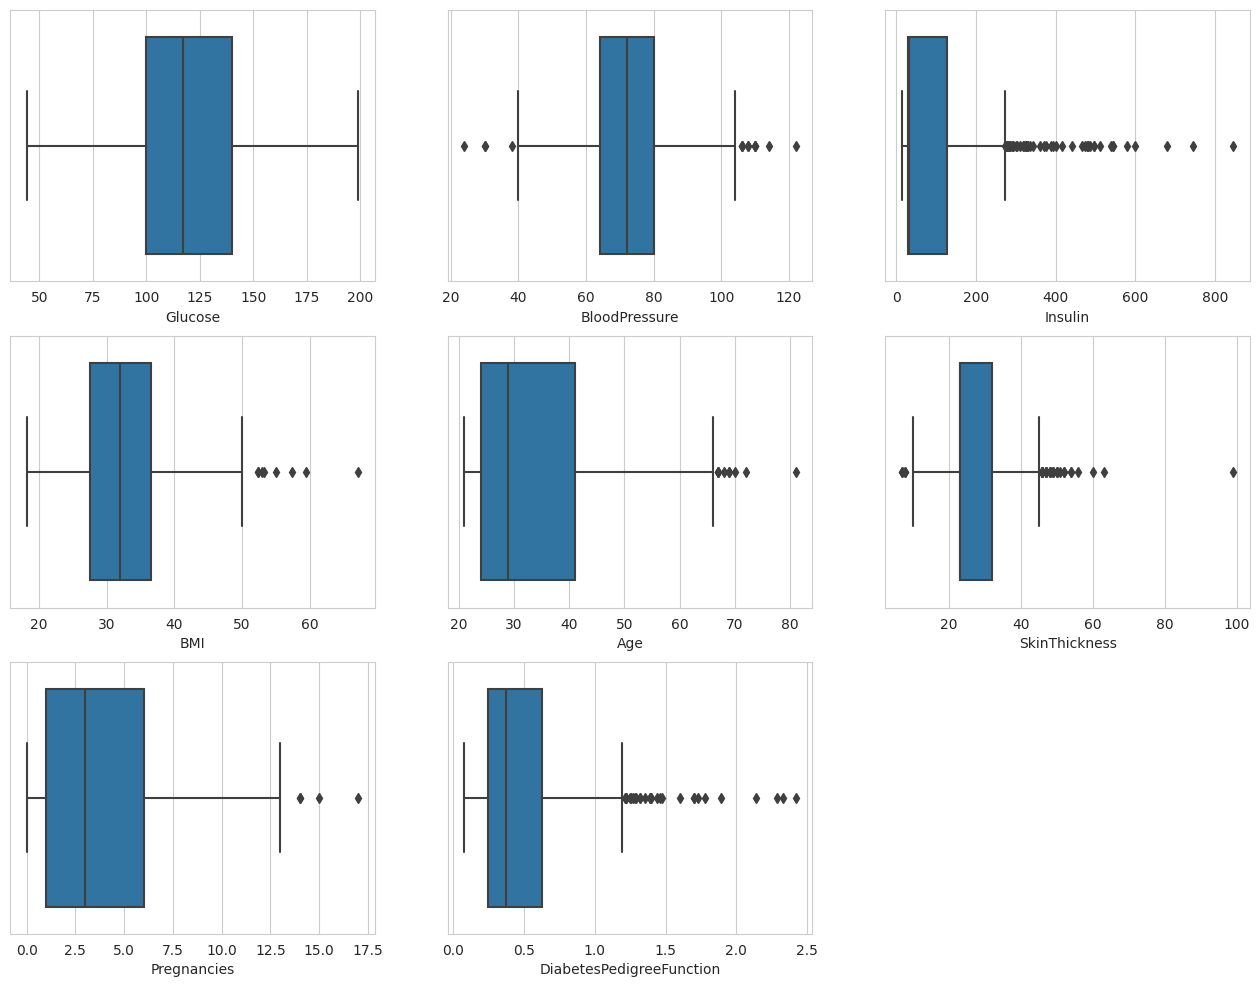

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

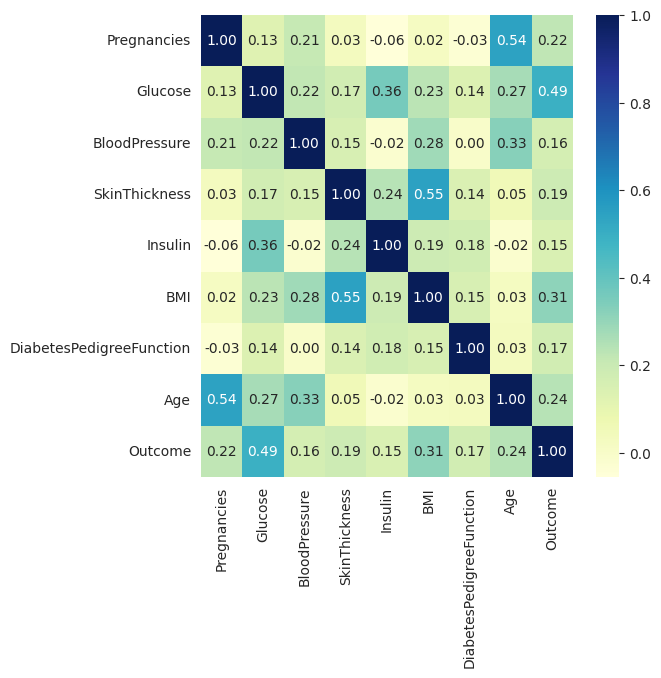

In [ ]:
plt.subplots(figsize=(6, 6))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

Blood pressure, Insulin and diabetesPedigreeFunction is not strongly related to Outcome so we can drop these.

In [ ]:
missing_values = df.isnull().sum()

print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add the target variable back to the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["Outcome"] = df["Outcome"]

print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (576, 8)
y_train shape: (576,)
x_test shape: (192, 8)
y_test shape: (192,)


In [ ]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 72.92 %


Precision: 0.62
Recall: 0.65
------------------------------------------------------------
[[95 28]
 [24 45]]


<Axes: >

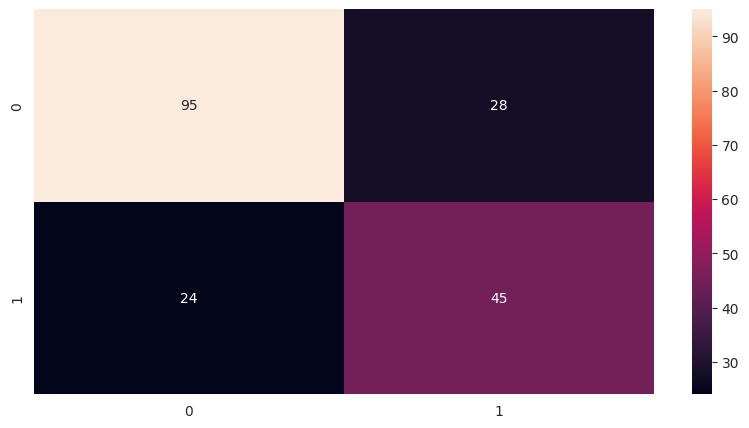

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 69.27 %


Precision: 0.56
Recall: 0.65
------------------------------------------------------------


<Axes: >

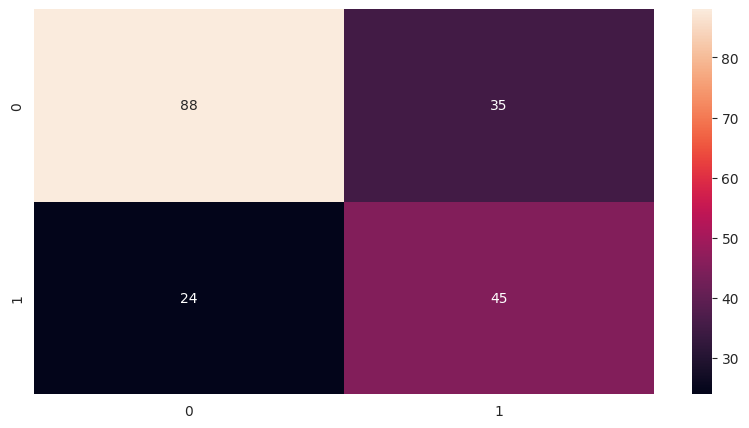

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def get_results_logistic_regression(df, with_scaling):
  """Gets the results of the logistic regression model with and without feature scaling.

  Args:
    df: The diabetes dataset.
    with_scaling: Whether to use feature scaling.

  Returns:
    A dictionary of results for the logistic regression model.
  """

  X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

  if with_scaling:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

  model = LogisticRegression()
  model.fit(X_train, y_train)

  results = {
      "confusion_matrix": confusion_matrix(y_test, model.predict(X_test)),
      "accuracy": accuracy_score(y_test, model.predict(X_test)),
      "precision": precision_score(y_test, model.predict(X_test)),
      "recall": recall_score(y_test, model.predict(X_test)),
  }

  return results


if __name__ == "__main__":
  df = pd.read_csv("diabetes.csv")

  # Logistic regression with feature scaling (without target variable)

  results_logistic_regression_with_feature_scaling_without_target = get_results_logistic_regression(df, True)

  # Logistic regression with feature and target variable scaling

  results_logistic_regression_with_feature_scaling_and_target = get_results_logistic_regression(df, True)

  scaling_cases = [
      ('Without Scaling', x_train, x_test),
      ('With Feature Scaling', scaler.transform(x_train), scaler.transform(x_test)),
      ('With Both Scaling', scaler.fit_transform(X), scaler.fit_transform(X))
  ]

  for model_name, X_train, X_test in scaling_cases:
    results = get_results_logistic_regression(df, with_scaling=False)

    if model_name != "My friend's assignment":
      print(f"Model: {model_name}")
      print(f"Confusion matrix:\n{results['confusion_matrix']}")
      print(f"Accuracy: {results['accuracy']}")
      print(f"Precision: {results['precision']}")
      print(f"Recall: {results['recall']}")

Model: Without Scaling
Confusion matrix:
[[95 28]
 [24 45]]
Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783
Model: With Feature Scaling
Confusion matrix:
[[95 28]
 [24 45]]
Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783
Model: With Both Scaling
Confusion matrix:
[[95 28]
 [24 45]]
Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783
